# Guiding questions

How does graduate student gender diversity at Columbia compare to its peer institutions?

In [168]:
from collections import defaultdict
import math
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [169]:
TOTALS = pickle.load(open('../../../data/SE-Detailed_Sex.p', 'rb'))
S_TOTALS = pickle.load(open('../../../data/S_Sex_Graduates.p', 'rb'))

years = sorted(TOTALS.keys())
institutions = sorted(TOTALS[ max(years) ].keys())
fields = {
    'Science': set(),
    'Engineering': set()
}
for year in years:
    inst_stats = TOTALS[year]['Columbia University in the City of New York']
    for seh in inst_stats.keys():
        for field in inst_stats[seh].keys():
            fields[seh].add(field)
fields['Science'] = sorted(fields['Science'])
fields['Engineering'] = sorted(fields['Engineering'])

print(f'Data set describes years {min(years)} - {max(years)} for {len(institutions)} institutions and {len(fields["Science"]) + len(fields["Engineering"])} fields.')

Data set describes years 1994 - 2016 for 11 institutions and 39 fields.


In [170]:
# Convenient function for making subplots for every institution
def subplots(num=len(institutions), cols=2, figsize=8):
    rows = math.ceil(num / cols)
    return plt.subplots(rows, cols, figsize=(figsize * cols, figsize * rows))

# Returns female proportions for an institution in a field
def get_proportions(seh, field, inst='Columbia University in the City of New York'):
    proportions = []
    for year in years:
        field_stats = TOTALS[year][inst][seh].get(field, None)
        if field_stats is None:
            proportions.append(None)
        else:
            proportions.append(field_stats.get('Female', 0) / field_stats['Total for selected values'])
    return proportions

# Plots female proportions for every institution for a field, highlighting one, in a line graph
def plot_inst(ax, seh, field, highlight='Columbia University in the City of New York'):
    for inst in institutions:
        if inst != highlight:
            ax.plot(years, get_proportions(seh, field, inst), label=inst)
    ax.plot(years, get_proportions(seh, field, highlight), label=highlight, linewidth=3, color='black')
    
    ax.set_ylabel('Percent female')
    ax.legend()
    ax.set_ylim(top=1, bottom=0)
    ax.set_title(f'{field}: Comparing Columbia\'s peers')
    
    # Format y tick labels to be percentages
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

# Returns female and male headcounts for a field in an institution
def get_counts(seh, field, inst='Columbia University in the City of New York', default=None):
    females = []
    males = []
    for year in years:
        stats = TOTALS[year][inst][seh].get(field, None)
        if stats is None:
            females.append(default)
            males.append(default)
            continue
        females.append(stats.get('Female', 0))
        males.append(stats.get('Male', 0))
    return females, males

# Plots a female and male headcounts line graph for a field in an institution
def plot_counts(ax, seh, field, inst='Columbia University in the City of New York'):
    females, males = get_counts(seh, field, inst)
    ax.plot(years, females, label='Female')
    ax.plot(years, males, label='Male')
    ax.legend()
    ax.set_ylim(bottom=0)
    ax.set_title(f'{field}: Columbia\'s headcounts by sex')
    ax.set_ylabel('Number of people')

def plot_connected(ax, seh, field, inst='Columbia University in the City of New York'):
    f, m = get_counts(seh, field, inst, default=0)
    ax.plot(f, m, color='lightgray')
    ax.scatter(f, m, c=[i for i in range(len(m))], cmap='viridis')

    for i in [0, -1]:
        ax.annotate(years[i], (f[i], m[i]))
    anh
    _, ymax = ax.get_ylim()
    _, xmax = ax.get_xlim()
    top = max(ymax, xmax)
    
    ax.set_ylim(bottom=0, top=top)
    ax.set_xlim(left=0, right=top)
    
    ax.plot([0, top], [0, top], color='gray', linestyle='--')

    ax.set_xlabel('Number of women')
    ax.set_ylabel('Number of men')

## Focusing on complete fields

We have to keep the analysis to fields that have data for every year since 1994. For science, there are 15 out of 30 such fields for Columbia, and 3 for all schools together. Is it possible to analyze an average from only 15?

In [236]:
complete_fields = {
    'Science': [],
    'Engineering': [],
}

for topic in complete_fields.keys():
    for field in fields[topic]:
        f, m = get_counts(topic, field)
        if None not in f and None not in m:
            complete_fields[topic].append(field)

In [239]:
def plot_topic(topic):
    selected = []
    for field in complete_fields[topic]:
        f, m = get_counts(topic, field)
        if max(f + m) > 30:
            selected.append(field)
    fig, axArr = subplots(len(complete_fields[topic])*3, cols=3)
    for i, field in enumerate(complete_fields[topic]):
        plot_inst(axArr[i, 0], topic, field)
        plot_counts(axArr[i, 1], topic, field)
        plot_connected(axArr[i, 2], topic, field)

In [230]:
def get_overall_counts(topic, inst='Columbia University in the City of New York'):
    overallF = [0 for _ in range(len(years))]
    overallM = [0 for _ in range(len(years))]
    counts = {field: get_counts(topic, field, inst, default=0) for field in complete_fields[topic]}

    for field in complete_fields[topic]:
        f, m = counts[field]
        for i in range(len(years)):
            overallF[i] += f[i]
            overallM[i] += m[i]
    return overallF, overallM

def get_overall_proportions(topic, inst='Columbia University in the City of New York'):
    overallF, overallM = get_overall_counts(topic, inst)
    return [0 if m+f == 0 else f/(m+f) for f, m in zip(overallF, overallM)]

def plot_topic_peers(ax, topic, highlight='Columbia University in the City of New York'):
    for inst in institutions:
        if inst != highlight:
            ax.plot(years, get_overall_proportions(topic, inst), label=inst)
    ax.plot(years, get_overall_proportions(topic, highlight), label=highlight, color='black', linewidth=3)
    ax.set_ylim(bottom=0, top=1)
    ax.set_title(topic)
    ax.legend()

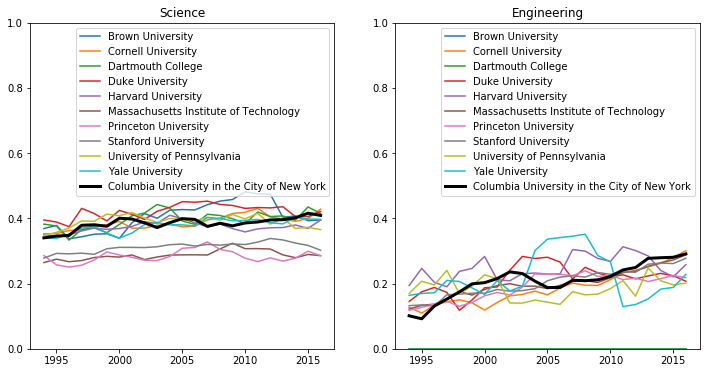

In [240]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_topic_peers(ax[0], 'Science')
plot_topic_peers(ax[1], 'Engineering')

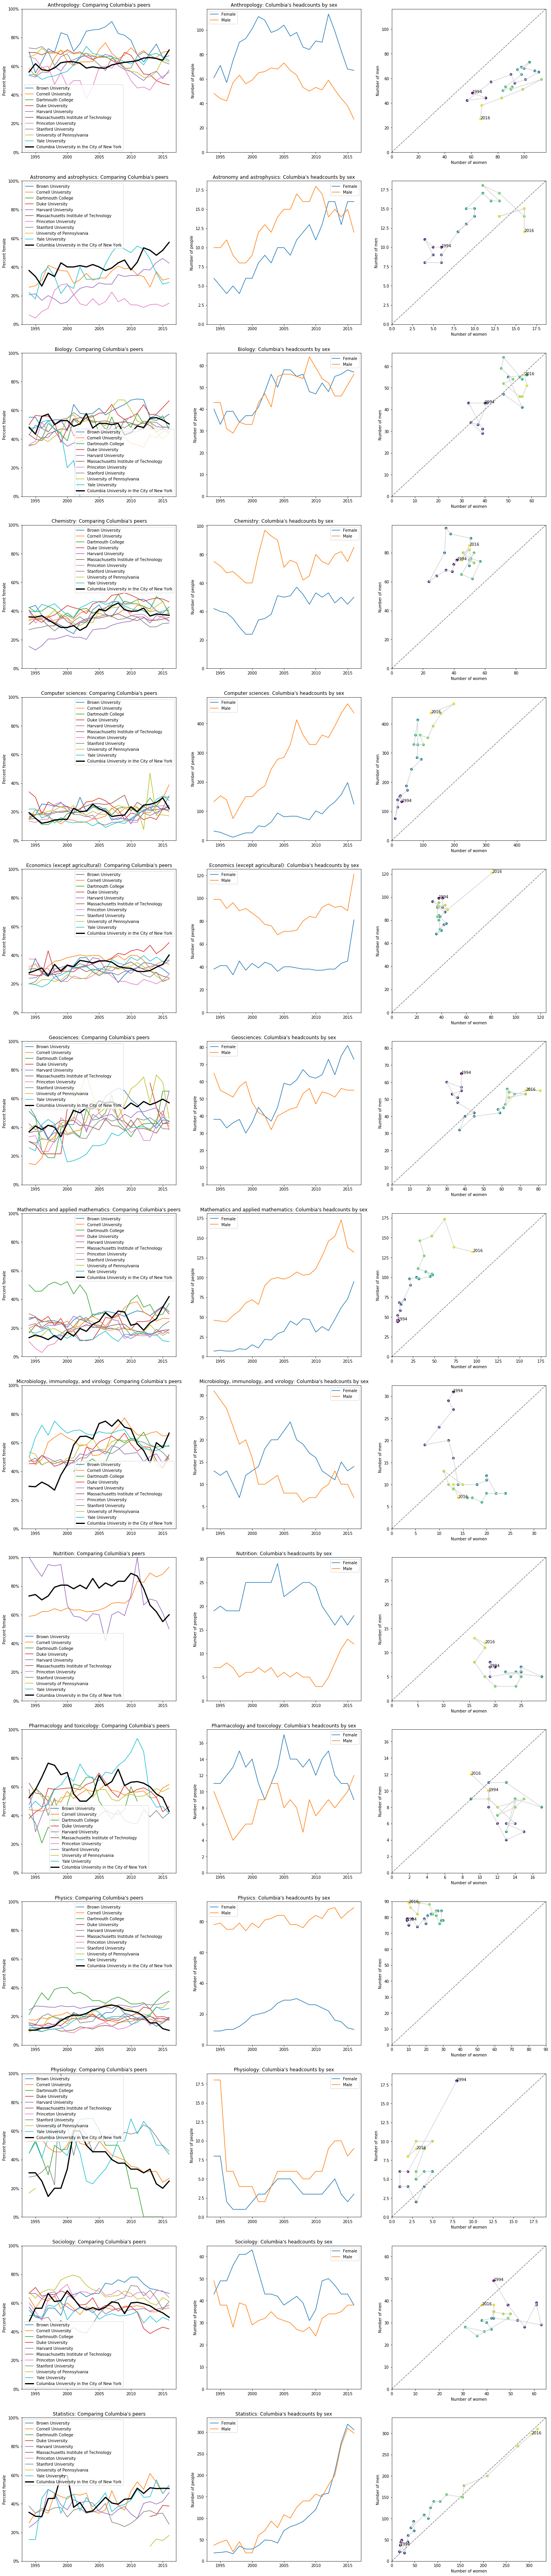

In [242]:
plot_topic('Science')

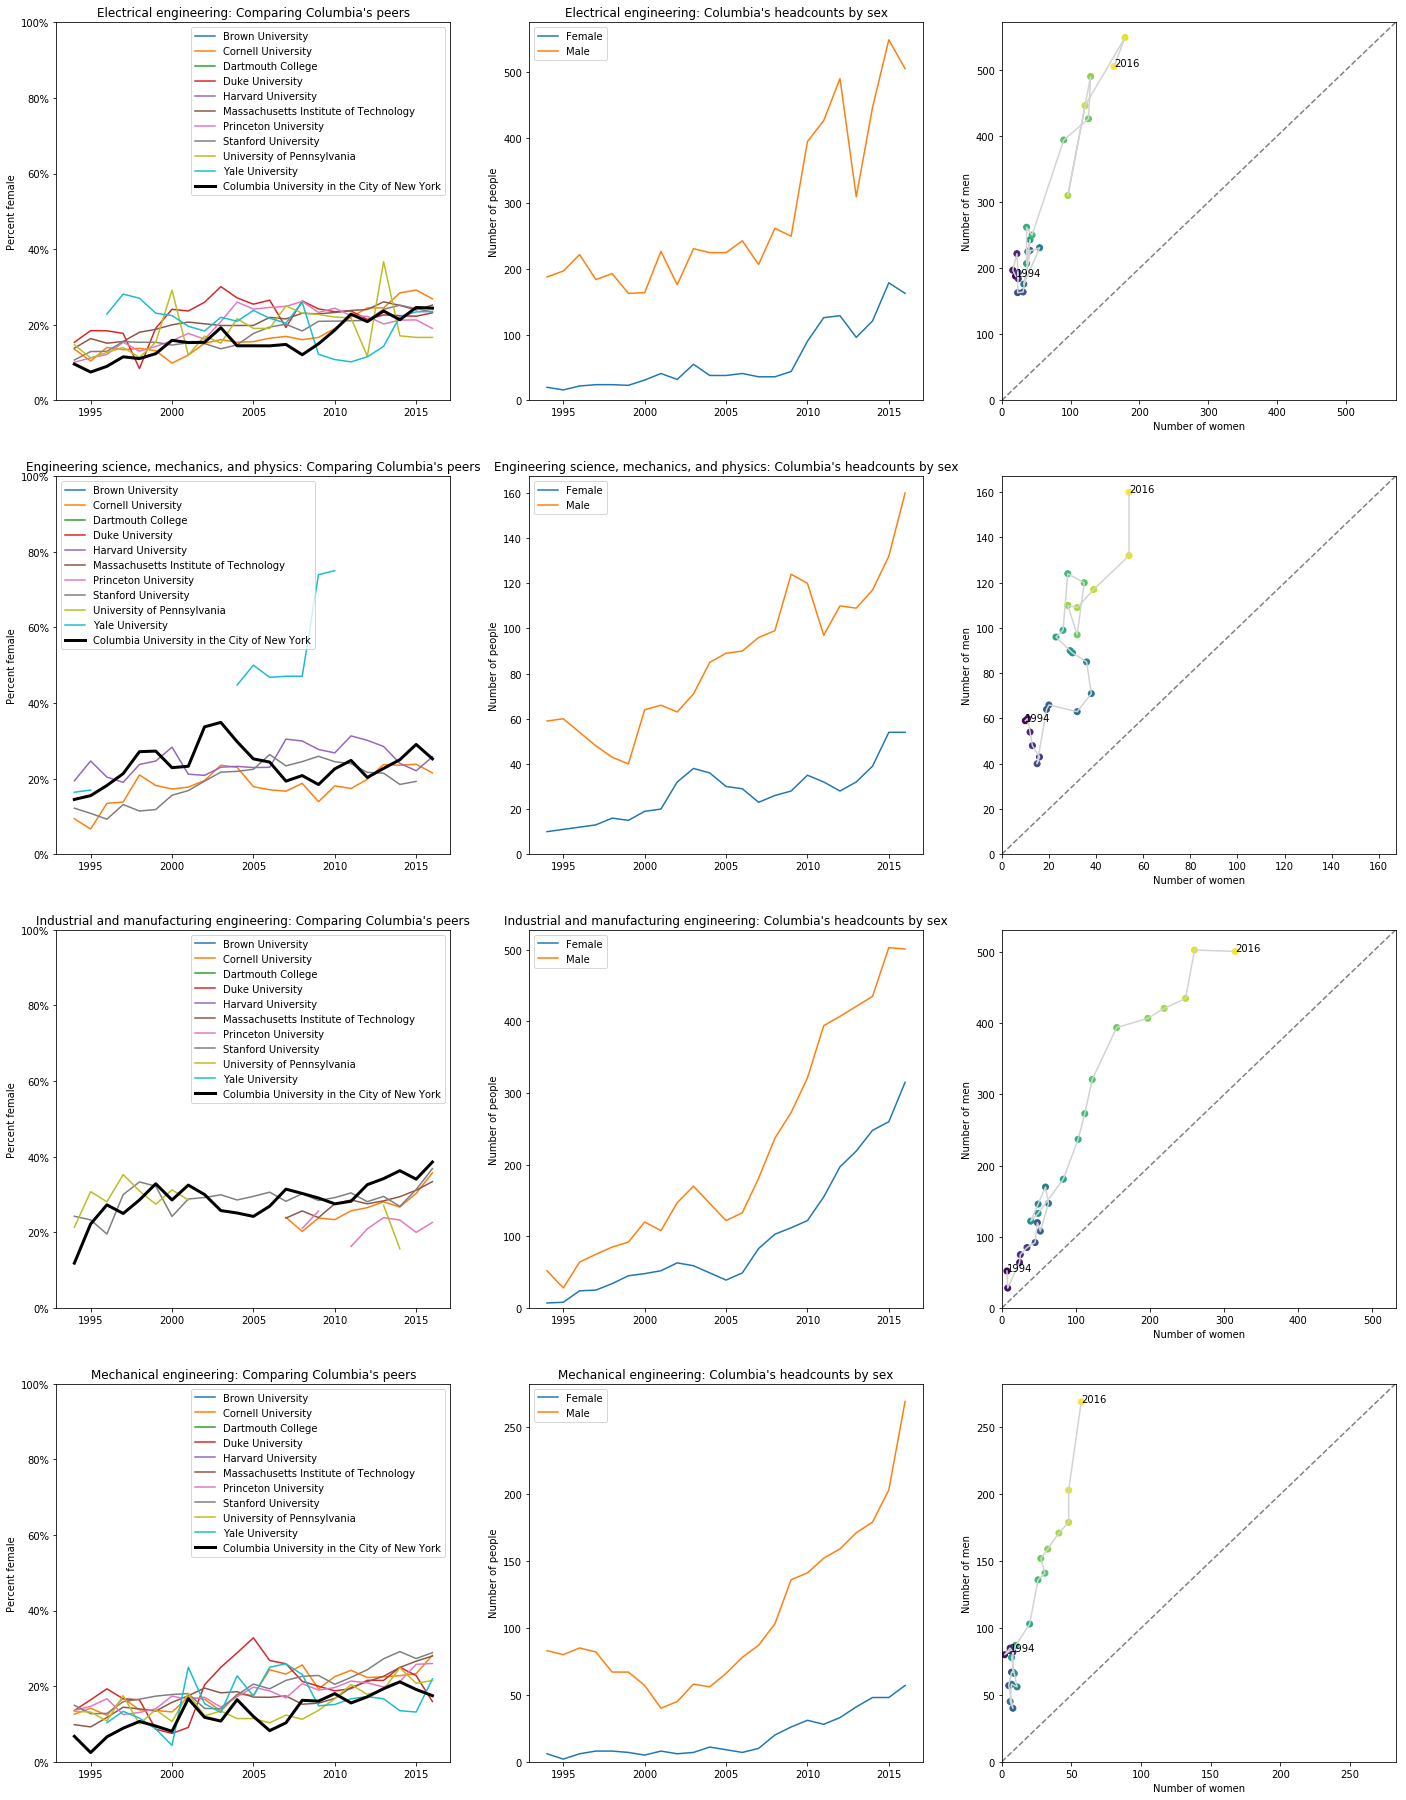

In [235]:
plot_topic('Engineering')

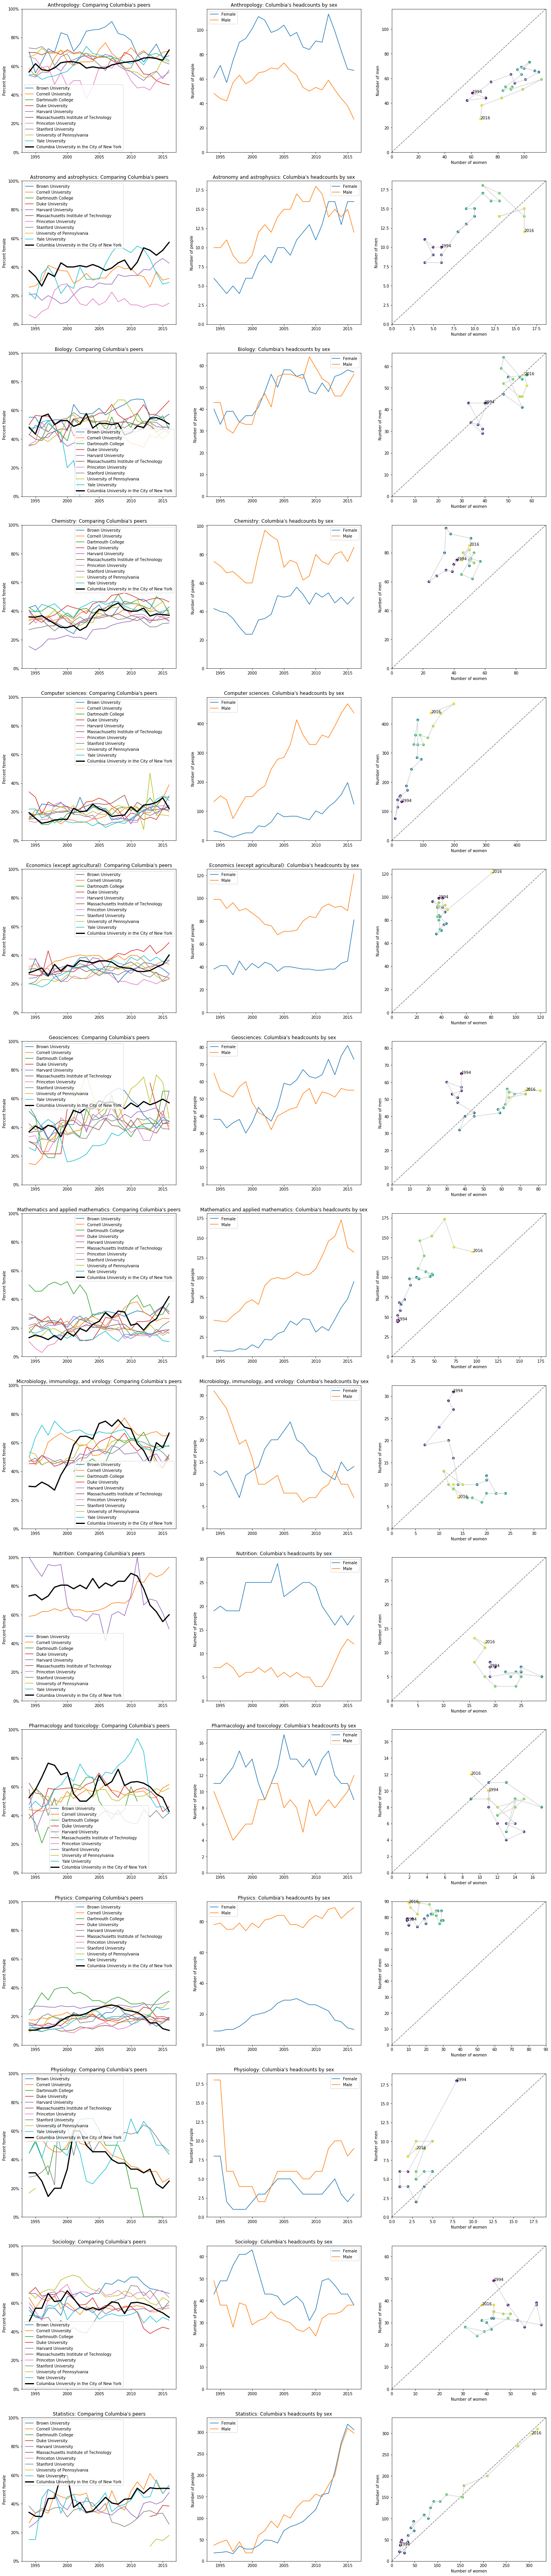

In [216]:
plot_topic('Science')

In [217]:
# Engineering has an interesting drop near 2002. Export all net changes to Flourish
target_years = years[1995 - years[0]:]

df = {}
df['Years'] = target_years
topic = 'Science'

for field in complete_fields[topic]:
    females, males = get_counts(topic, field)
    changes = []
    for year in target_years:
        i = year - years[0]
        changes.append((males[i] - males[i-1]) - (females[i] - females[i-1]))
    df[field] = changes

females, males = get_overall_counts(topic)
changes = []
for year in target_years:
    i = year - years[0]
    changes.append((males[i] - males[i-1]) - (females[i] - females[i-1]))
df[topic] = changes

df = pd.DataFrame(df)
df.to_csv('changes.csv')

In [229]:
topic = 'Science'
df = {
    'Years': years
}
for field in complete_fields[topic]:
    df[field] = get_proportions('Science', field) 
df[topic] = get_overall_proportions(topic)
df = pd.DataFrame(data=df)
df.to_csv('proportions.csv')

In [227]:
df

Years  Anthropology  Astronomy and astrophysics   Biology  Chemistry  \
0    1994      0.559633                    0.375000  0.481928   0.358974   
1    1995      0.617391                    0.333333  0.434211   0.357143   
2    1996      0.575758                    0.266667  0.557143   0.367925   
3    1997      0.568182                    0.357143  0.573529   0.339806   
4    1998      0.588235                    0.333333  0.500000   0.311828   
5    1999      0.624161                    0.428571  0.528571   0.285714   
6    2000      0.631250                    0.400000  0.528571   0.285714   
7    2001      0.630682                    0.400000  0.488095   0.298246   
8    2002      0.620690                    0.409091  0.505263   0.265152   
9    2003      0.586826                    0.400000  0.577320   0.290076   
10   2004      0.595238                    0.416667  0.476190   0.361702   
11   2005      0.587571                    0.400000  0.508772   0.413223   
12   2006      0.586420                    0.375000  0.508772   0.401575   
13   2007      0.608696                    0.392857  0.500000   0.435115   
14   2008      0.618705                    0.428571  0.509091   0.456140   
15   2009      0.626866                    0.448276  0.428571   0.409091   
16   2010      0.631944                    0.379310  0.443396   0.398496   
17   2011      0.638298                    0.433333  0.490566   0.400000   
18   2012      0.656977                    0.533333  0.480000   0.420635   
19   2013      0.660000                    0.516129  0.544554   0.365079   
20   2014      0.653543                    0.481481  0.549020   0.378788   
21   2015      0.641509                    0.516129  0.532110   0.375000   
22   2016      0.712766                    0.571429  0.504425   0.370370   

    Computer sciences  Economics (except agricultural)  Geosciences  \
0            0.193939                         0.277372     0.368932   
1            0.154696                         0.292857     0.408602   
2            0.120253                         0.310606     0.383721   
3            0.127907                         0.255814     0.413793   
4            0.142857                         0.335821     0.400000   
5            0.147727                         0.289062     0.333333   
6            0.147727                         0.330769     0.428571   
7            0.225225                         0.319672     0.517241   
8            0.200855                         0.363636     0.500000   
9            0.205212                         0.355932     0.536232   
10           0.252688                         0.346154     0.529412   
11           0.221918                         0.360360     0.584158   
12           0.201946                         0.360360     0.568627   
13           0.167339                         0.351351     0.575472   
14           0.173913                         0.322034     0.558333   
15           0.177500                         0.311475     0.529412   
16           0.235431                         0.308333     0.568807   
17           0.201327                         0.286822     0.542373   
18           0.246253                         0.285714     0.579365   
19           0.251908                         0.292308     0.556522   
20           0.265203                         0.316176     0.572519   
21           0.297297                         0.335821     0.595588   
22           0.222420                         0.400990     0.570312   

    Mathematics and applied mathematics  \
0                              0.132075   
1                              0.150943   
2                              0.137255   
3                              0.118644   
4                              0.147059   
5                              0.116883   
6                              0.172414   
7                              0.142857   
8                              0.196429   
9                              0.176471   
1